### 統計學習與深度學習 (Fall, 2020)
### Homework 1

請將IPYNB檔上傳至COOL作業區。回答作業時建議使用 "三明治" 答題法。也就是說，先說明要做什麼，然後列出程式碼與結果，最後說明這些結果的意義。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。


### 第一題 [myknn_regressor]
(35%) K-nearest-neighbors (KNN) is a powerful method to construct nonparametric regression models. The goal of this question is to construct your own KNN regressor. To simplify the question, we will use the "brute-force" method to find the nearest neighbors. That is, we are not going to use specialized data structures such as the K-D tree to speed up the process. Given a set of $N$ training data points and a pre-defined hyper-parameter $k$, the prediction for a test data point $x_a$ is computed by locating $k$ data points in the training data that are closest to $x_a$. Use Euclidean distance to measure the distance between two instances. If the labels (i.e., outcome values) of the $k$ nearest neighbors are $\mathbf{y}_a = \{y_1, y_2, ..., y_k\}$, then the prediction is $f(\mathbf{y}_a)$, where $f$ is a real-valued function. We are going to consider two possible choices of $f$. The first option is  $f(\mathbf{y}_a) = 1/k \sum_{i=1}^k y_i.$ This is the "equal-weight" case. The other option is to compute the mean after removing outliers. We define outliers as the data points outside of $[Q1 - 1.5 IQR, Q3 + 1.5 IQR]$, where $Q1$ and $Q3$ are the first and third quantiles of $\mathbf{y}_a$, and $IQR = Q3 - Q1$. Since quantiles and IQR only make sense when there are enough neighbors, we allow the "remove_outliers" only if $k>=10$. If $k<10$, use the "equal_weight" $f$ even if the user specify the other way. 

Creat a Python class named myknn_regressor that can make predictions given the training data and hyper-parameters. It should take the $k$ as the hyper-parameter for the number of neighbors. Moreover, the user can select $f$ by passing "equal_weight" or "remove_outliers" to select one of the two possible cases for $f$. 

The sample usage should be like the following:
```python
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)
```

The first line initiates a myknn_regressor object with $k=20$ and selected "remove_outliers" for $f$; the second line train the model, and the third line computes prediction. 

Use the following skeleton to jump-start your implementation. Do not change the parameter definitions for class methods. 

```python
class myknn_regressor():
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
        """mean_type can be equal_weight or remove_outliers.
                              equal_weight use the same weight for all neighbors.
                              remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 + 1.5IQR]."""
        ### Add your code here ###      

    def fit(self, x_train, y_train):
         ### Add your code here ###

    def predict(self, x_test):
        """use remove_outliers only if k>=10"""
         ### Add your code here ###

```


You are only allowed to use numpy in your myknn_regressor class. You will receive a zero score if you adopt an existing KNN implementation, such as the one in scikit-learn. The input features and output predictions should be numpy arrays. If there is a tie in selecting neighbors, myknn_regressor should break the tie by choosing the data point that is located closer to the beginning of the training dataset. 

#### Dataset
We are going to use a subset of the "Million Songs Dataset" in this question. The dataset has been pre-processed, and the training and the test datasets are stored in a dictionary data structure. You can load the data from *msd_data1.pickle* using pickle.load(). There are four elements in the dictionary: x_train, y_train, x_test, y_test. As indicated by their names, these four elements are training and test data. The label (i.e., $y$) is the year a song was released, and the features are variables that characterize the sound of a song. The goal is to predict the release year given sound features.

You can use the following sample code to load and standardize data. 
```python
import pickle
from sklearn import preprocessing
import numpy as np

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']
```


Answer the following questions:

* Q1.1 Create your myknn_regressor based on the skeleton. 
* Q1.2 Load data from msd_data1.pickle. You should standardize all feature values to have a zero mean and unit variance before training a KNN model.  Make predictions using $k=20$ and "equal_weight" $f$. List the RMSE and the first 20 predictions in the test data. 
* Q1.3 Load data from msd_data1.pickle. Standardized all feature values so that all features have a zero mean and unit variance.  Make predictions using $k=20$ and "remove_outier" $f$. List the RMSE and the first 20 predictions in the testing data. 


In [35]:
import pickle
from sklearn import preprocessing
import numpy as np

#Load data
def dataReader(doScaling:bool):
    with open('msd_data1.pickle', 'rb') as fh1:
        msd_data = pickle.load(fh1)

    if (doScaling):
        xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
        #standardize feature values
        X_train = xscaler.transform(msd_data['X_train'])
        X_test = xscaler.transform(msd_data['X_test'])
    else:
        X_train = msd_data['X_train']
        X_test = msd_data['X_test']

    Y_train = msd_data['Y_train']
    Y_test = msd_data['Y_test']
    
    return (X_train, X_test, Y_train, Y_test)

## Q1.1

In [42]:
import numpy as np


class myknn_regressor():
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
        """mean_type can be equal_weight or remove_outliers.
                              equal_weight use the same weight for all neighbors.
                              remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 + 1.5IQR]."""
        self.n_neighbors = n_neighbors
        self.mean_type = mean_type
        self._x_train = None
        self._y_train = None

    def fit(self, x_train, y_train):
        self._x_train = x_train
        self._y_train = Y_train

    def predict(self, x_test):
        """use remove_outliers only if k>=10"""
        CRITICAL_K = 10
        
        predict_value = np.zeros(x_test.shape[0])
        
        for data_i, data in enumerate(x_test):
            neighbor_index = self._find_neighbors(data)
            
            result = 0.0
            # Prediction
            if(self.mean_type == "remove_outliers" and self.n_neighbors >= CRITICAL_K):
                neighbor_y = np.zeros(len(neighbor_index))
                for index, neighbor_i in enumerate(neighbor_index):
                    neighbor_y[index] = self._y_train[neighbor_i]
                # we use 1.5 standard deviation to fing outliers
                neighbor_y = neighbor_y[abs(neighbor_y - np.mean(neighbor_y)) <= \
                                        1.5 * np.std(neighbor_y)]
                result = neighbor_y.mean()
                 
            else:
                for neighbor_i in neighbor_index:
                    y = self._y_train[neighbor_i]
                    result += y
                result /= self.n_neighbors
                
            # Record the prediction
            predict_value[data_i] = result
        return predict_value
        
    def _find_neighbors(self, one_x_test):
        '''
        @param {np.array} one_x_test - one data in x_test
        
        @return {list of index} top neighbors' index - 
                the indices of the top k closest neighbors to one_x_test. 
        '''
        distance_list = list() # element: tuple(index, value)
        for index, neighbor in enumerate(self._x_train):
            distance = np.sqrt(np.power(one_x_test-neighbor, 2).sum())
            distance_list.append((index, distance))
        distance_list = sorted(distance_list, key=lambda x:x[1])
        return [i[0] for i in distance_list[:self.n_neighbors]]
        
def RMSE(y_pred, y_test):
    return np.sqrt(np.power((y_pred-y_test), 2).sum()/len(y_pred))

## Q1.2

In [37]:
# read data
X_train, X_test, Y_train, Y_test = dataReader(True)

In [38]:
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_train, Y_train)
y_pred = myknn.predict(X_test)

In [39]:
print('ypred[:20]:', y_pred[:20])
print('RMSE:', RMSE(y_pred, Y_test))

ypred[:20]: [1993.35 1993.8  2000.65 1991.5  1992.8  1998.5  1988.1  1991.65 2002.25
 2003.   2000.5  1998.65 1995.55 1997.2  1995.05 1997.4  1992.15 2000.45
 2003.2  1995.75]
RMSE: 10.25126451549596


## Q1.3

In [62]:
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train, Y_train)
y_pred = myknn.predict(X_test)

In [63]:
print('ypred[:20]:', y_pred[:20])
print('RMSE:', RMSE(y_pred, Y_test))

ypred[:20]: [1995.83333333 1993.83333333 2000.88235294 1990.94117647 1994.72222222
 2001.38888889 1988.1875     1995.76470588 2004.41176471 2004.55555556
 2001.52631579 2002.         2000.875      1997.55555556 1998.61111111
 1998.88888889 1995.44444444 2003.83333333 2005.29411765 1996.94736842]
RMSE: 10.266357743763097


### 第二題 [Tuning the Hyper-parameter]
(20%) Hyper-parameter tuning is an important skill required in many model training tasks. We are going to consider three settings in this question. Use the KNN regressor from sklearn.neighbors.KNeighborsRegressor for the first two settings, and your myknn_regressor for the third setting. 

For each setting, use the data from msd_data1.pickle to train and test the KNN models. Compute the RMSE on the testing dataset using $k=1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200$. In the first case, all feature values are standardized to have unit variances and zero means. As for the second case, do not apply feature scaling. The third case uses standardized features and adopted myknn_regressor with "remove_outlier" $f$ to make predictions. 

For each setting, plot a curve that shows the relations between $k$ (x-axis) and RMSE (y-axis). If possible, plot the three curves in the same figure to visually inspect their dynamics. Discuss your observations. 



In [6]:
import sklearn
k_list = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200]

## Case1

In [17]:
# read data
X_train, X_test, Y_train, Y_test = dataReader(True)

In [18]:
from sklearn.neighbors import KNeighborsRegressor
result_sklearn_std = list()
for k in k_list:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, Y_train)
    y_pred = (neigh.predict(X_test))
    result_sklearn_std.append(RMSE(y_pred, Y_test))

## Case 2

In [19]:
# read data
X_train, X_test, Y_train, Y_test = dataReader(False)

In [20]:
from sklearn.neighbors import KNeighborsRegressor
result_sklearn_no_std = list()
for k in k_list:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, Y_train)
    y_pred = (neigh.predict(X_test))
    result_sklearn_no_std.append(RMSE(y_pred, Y_test))

## Case 3

In [30]:
# read data
X_train, X_test, Y_train, Y_test = dataReader(True)

In [31]:
from sklearn.neighbors import KNeighborsRegressor
result_myknn = list()
for k in k_list[]:
    neigh = myknn_regressor(k, "remove_outliers")
    neigh.fit(X_train, Y_train)
    y_pred = (neigh.predict(X_test))
    result_myknn.append(RMSE(y_pred, Y_test))

## Plot the relationship

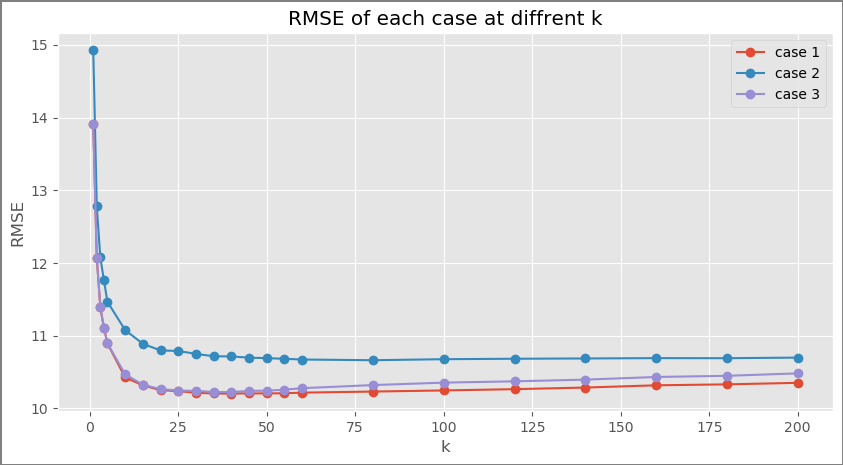

In [61]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(10, 5), dpi=100,linewidth = 2)

plt.title("RMSE of each case at diffrent k")
plt.xlabel("k")
plt.ylabel("RMSE")

case1 = plt.plot(k_list, result_sklearn_std,'o-', label="case 1")
case2 = plt.plot(k_list, result_sklearn_no_std, "o-", label="case 2")
case3 = plt.plot(k_list, result_myknn, "o-", label="case 3")

plt.legend()


plt.show()

In [34]:
import json
with open("./log/rmse_sklearn_std.json", 'w') as file:
    json.dump(result_sklearn_std, file)
with open("./log/rmse_sklearn_no_std.json", 'w') as file:
    json.dump(result_sklearn_no_std, file)
with open("./log/rmse_myknn.json", 'w') as file:
    json.dump(result_myknn, file)

### 第三題 [Lasso Regression]
(45%) Lasso Regression是一個加上L1 Regularization的線性模型。給定$n$筆Training Data, $(y_i, \mathbf{x}_i), i = 1, 2, ..., n$, 其中$y_i$為實數標籤，$\mathbf{x}_i$為長度為$M$的實特徵向量。我們想要找到一個權重向量$\mathbf{w}$與$w_0$ (Bias Term)，讓$L$最小化:
$$
L = \frac{1}{2n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i - w_0)^2 + \lambda [\sum_{j=1}^{M} |w_j|]
$$

注意這裡定義的$L$與投影片中的有些許不同。上面$L$第一項有除以訓練資料量$n$，而投影片中的$L$沒有。$L$中第一項除以資料量的好處是讓Regularization Coefficient的意義，也就是規範模型強度這件事，在不同的訓練資料量下大致相同。也就是如果訓練資料量增大之後，我們可以直接使用在比較小量的訓練資料中調教得到的Regularization Coefficient，或是的在原本的設定附近搜尋即可。

另外上面的$L$並沒有Regularized Bias Term。這也是一般常用的設定。如果要Regularize Bias Term，則Loss Function便應寫成
$$
L' = \frac{1}{2n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i - w_0)^2 + \lambda [|w_0| + \sum_{j=1}^{M} |w_j|]
$$

因為本題$L$的定義與投影片中不同，因此你不能直接使用投影片提供的Coordinate Descent with Soft Thresholding公式實作。你必須要依照新的設定重新推導公式。推導公式以$L$為主，但實作時需要能處理$L'$的狀況。

本題的任務是實作一個名為mylasso的Class，這個Class可以用來訓練一個Lasso Regression模型以及用訓練好的模型做預測。

```python
mlo = mylasso(lamcoef = 0.1)
mlo.fit(x_train, y_train)
ypred = mlo.predict(x_test)
```

下面是mylasso的骨架，你應該由這裡出發，建構自己的mylasso。

```python
import numpy as np

class mylasso():
    def __init__(self, lamcoef = 0.1, max_iter=1000, tol=1e-6, const_regu = False):
        """lamcoef: the regularization coefficient
           max_iter: maximum number of iteration for model training
           tol: tolerance for the stopping criteria for model training
           const_regu: whether the constant term should be regularized, default to False
           """
        ### Add your code here ###

    def fit(self, x_train, y_train, winit = "ridge", keep_traindata = True, verbose = False):
        """Fit a Lasso model
           x_train: a numpy matrix that contains training features
           y_train: a numpy matrix that contains the label
           winit: how weights are initialized, default to "ridge", ridge regression
           keep_traindata: whether the object is going to keep training data after the training process completed
           verbose: output a lot of message"""
        ### Add your code here ###
        
    def predict(self, x_test):
        """Make prediction using trained model"""
        
        ### Add your code here ###

```

#### 注意事項:
* 請不要改動mylasso骨架中各方法(Method)的傳入參數定義。這可以讓每個人的實作一致，方便助教批改。
* 我們假設傳入的x_train是一個$n \times M$的Numpy Array，y_train是一個一維的Numpy Array，長度為$n$。x_train中沒有一個全為1的Column，也就是說模型要自己加上常數項。
* 一般而言，Bias Term不受L1 Regularization限制，因此const_regu預設值為False。你的程式碼必須要能處理Bias Term受L1 Regularization限制或不受L1 Regularization限制兩種狀況。也就是要能處理Loss為$L$或$L'$的狀況。
* lamcoef對應到題目中$L$裡的$\lambda$。預設值是0.1。
* 一般來說，在使用Coordiniate Descent with Soft Thresholding的過程。我們會固定個維度更新的順序，常常都是由維度0開始一路往下做，然後再重頭循環。維度的順序在線性模型學習通常沒有太大的影響。每次一個維度更新之後，下一個維度在計算時必須使用"所有最新"的權重。
* Coordinate Descent with Soft Thresholding遞迴的最大次數由max_iter控制。超過最大次數即停止參數更新。遞迴一次的意思是使用Coordinate Descent with Soft Thresholding更新過所有的參數。
* 每次遞迴之後計算L，如果跟上一個L的改變幅度小於tol，則停止遞迴，回傳過程中最低的L所對應到的權重向量。
* 在開始利用Coordinate Descent with Soft Thresholding更新$\mathbf{w}$之前，應先使用Ridge Regression計算出一個初始的$\mathbf{w}$。由這個初始值開始Coordinate Descent with Soft Thresholding更新。細節(如L2 Regularization應設多少之類的)請自行設計。
* 如果keep_traindata為真，那mylasso物件應該保留一份Training Data在物件的Attribute內。否則不要保留Training Data。
* mylasso的實作應該只會用到numpy以及基本的Python函式。你不應該使用現成的Lasso或Ridge Regression函式(如sklearn.linear_model.Lasso)。違反這項規定本題以零分計。
* 你的實作應該盡量"向量化"，也就是盡量用矩陣運算取代迴圈。向量化有助於計算速度的提升。

#### 資料集
本題會使用"Million Songs Dataset"的一個子集。請使用pickle.load()讀取*msd_data1.pickle*以取得預先整理好的資料。這個pickle檔內含一個Dictionary，裡面的四個元素的鍵值分別為 X_train, Y_train, X_test, Y_test，分別對應到訓練特徵、訓練標籤、測試特徵、測試標籤。其中標籤是一首歌發行的年份，而特徵是這首歌的音波特性。我們的目標是預測歌曲的發行年分。這個資料集的特徵值沒有標準化，你應該先把特徵值標準化之後再進行模型的訓練與測試。

以下是讀取資料與標準化特徵的範例程式，你可以直接使用這個程式片段:

```python
#load the dataset, and create normalized and raw features. 
import pickle
from sklearn import preprocessing
import numpy as np
np.set_printoptions(suppress=True)

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
#standardize feature values
X_train_sd = xscaler.transform(msd_data['X_train'])
X_test_sd = xscaler.transform(msd_data['X_test'])

#outcome values
Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

```

### 回答下面問題: 

* Q3.1 基於本題給的$L$，推導新的Coordinate Descent with Soft Thresholding公式 
* Q3.2 使用給定個骨架建構你的mylasso。
* Q3.3 載入資料集，並且使用訓練資料計算Lasso Regression的權重，設定lamcoef = 0.1，其他參數使用預設值。列出Training Loss、Root Mean Squared Error (RMSE) in Training Data、Mean Absolute Error (MAE) in Training Data、Intercept (截距項)、Feature Weights (除了截距項的所有權重)、非零權重的個數。為了讓結果容易閱讀，請使用`np.set_printoptions(suppress=True)`關閉Scientific Notation。
* Q3.4 使用上一小題的模型計算測試資料的預測值。列出前五筆資料的預測年分、Test RMSE、Test MAE。
* Q3.5 使用下面的$\lambda$訓練模型: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2。記錄每一個$\lambda$的Training Loss、Number of Nonzero Weights、Average Weight Size (Mean of Absolute Weight)、Training RMSE、Test RMSE。將所有的結果列表、畫折線圖、並寫下你對結果的觀察。


## 3-1 
<img src="./3_1_L.jpg">

In [ ]:
#load the dataset, and create normalized and raw features. 
import pickle
from sklearn import preprocessing
import numpy as np
np.set_printoptions(suppress=True)

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
#standardize feature values
X_train_sd = xscaler.transform(msd_data['X_train'])
X_test_sd = xscaler.transform(msd_data['X_test'])

#outcome values
Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']